In [2]:
import os
import pandas as pd

# Step 1: Define your processed data folder
folder_path = "data/processed"

# Step 2: Get all CSV files from that folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Step 3: If there are any CSVs, find the latest one based on modification time
if csv_files:
    latest_file = max(csv_files, key=lambda f: os.path.getmtime(os.path.join(folder_path, f)))
    latest_path = os.path.join(folder_path, latest_file)
    print(f"✅ Latest CSV file detected: {latest_file}")
    print(f"📂 Full path: {os.path.abspath(latest_path)}")

    # Step 4: Load it into a pandas DataFrame
    df = pd.read_csv(latest_path)
    print("\n📊 Preview of the dataset:")
    display(df.head())
else:
    print("⚠️ No CSV files found in the 'data/processed' folder.")


✅ Latest CSV file detected: infinite_scroll_quotes.csv
📂 Full path: c:\Users\boban\OneDrive\Desktop\web_scraping_basics\data\processed\infinite_scroll_quotes.csv

📊 Preview of the dataset:


,text,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


In [2]:
import os
import pandas as pd

# Step 1: Define your processed data folder
folder_path = "data/processed"

# Step 2: Get all CSV files from that folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Step 3: If there are any CSVs, find the latest one based on modification time
if csv_files:
    latest_file = max(csv_files, key=lambda f: os.path.getmtime(os.path.join(folder_path, f)))
    latest_path = os.path.join(folder_path, latest_file)
    print(f"✅ Latest CSV file detected: {latest_file}")
    print(f"📂 Full path: {os.path.abspath(latest_path)}")

    # Step 4: Load it into a pandas DataFrame
    df = pd.read_csv(latest_path)
    print("\n📊 Preview of the dataset:")
    display(df.head())
else:
    print("⚠️ No CSV files found in the 'data/processed' folder.")


✅ Latest CSV file detected: infinite_scroll_quotes.csv
📂 Full path: c:\Users\boban\OneDrive\Desktop\web_scraping_basics\data\processed\infinite_scroll_quotes.csv

📊 Preview of the dataset:


,text,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


In [3]:
# Basic dataset overview
print("🔍 Dataset shape:", df.shape)
print("\n📋 Column names:\n", df.columns.tolist())

# Checking data types and missing values
print("\n📊 Data Info:")
df.info()

print("\n🧩 Missing Values:")
print(df.isnull().sum())


🔍 Dataset shape: (100, 3)

📋 Column names:
 ['text', 'author', 'tags']

📊 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    100 non-null    object
 1   author  100 non-null    object
 2   tags    97 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB

🧩 Missing Values:
text      0
author    0
tags      3
dtype: int64


In [4]:
df.shape

(100, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    100 non-null    object
 1   author  100 non-null    object
 2   tags    97 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB


In [6]:
df.isna().sum()

text      0
author    0
tags      3
dtype: int64

In [7]:
df['tags'] = df['tags'].fillna('Unknown')
print("✅ Filled missing 'tags' with 'Unknown'.")


✅ Filled missing 'tags' with 'Unknown'.


In [8]:
df.isna().sum()

text      0
author    0
tags      0
dtype: int64

In [9]:
# Length of each quote
df['quote_length'] = df['text'].apply(len)

# Number of tags per quote
df['num_tags'] = df['tags'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Show summary
df[['quote_length', 'num_tags']].describe()


,quote_length,num_tags
count,100.000000,100.000000
mean,122.270000,2.350000
std,133.747376,1.647618
min,34.000000,1.000000
25%,66.500000,1.000000
50%,86.000000,2.000000
75%,125.000000,3.000000
max,1084.000000,8.000000


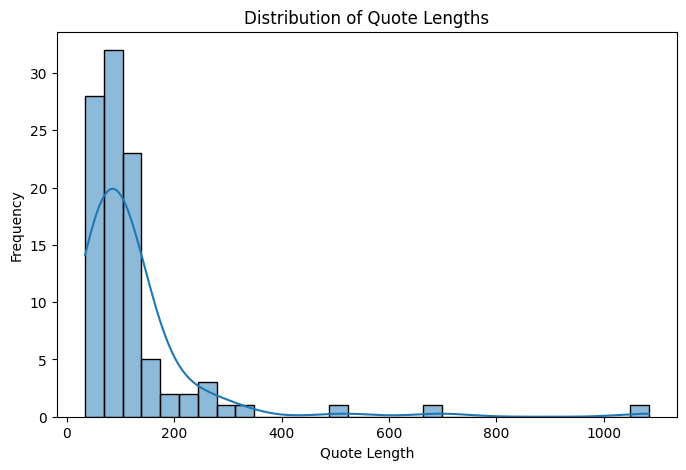

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['quote_length'], bins=30, kde=True)
plt.title('Distribution of Quote Lengths')
plt.xlabel('Quote Length')
plt.ylabel('Frequency')
plt.show()


C:\Users\boban\AppData\Local\Temp\ipykernel_15672\3127282864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


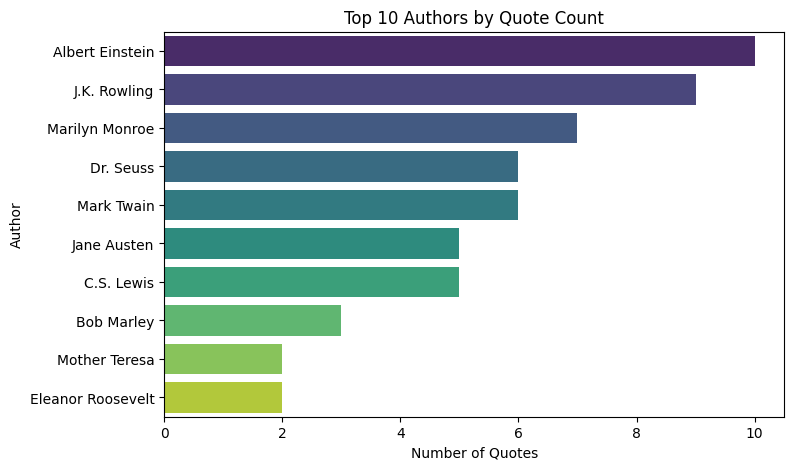

In [11]:
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Quote Count')
plt.xlabel('Number of Quotes')
plt.ylabel('Author')
plt.show()


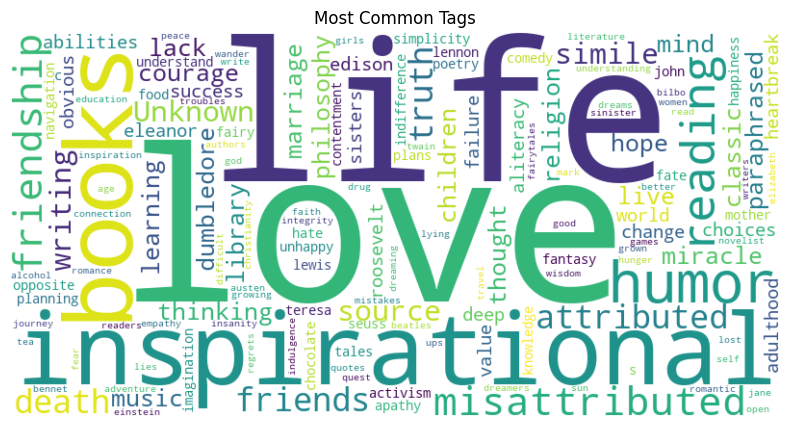

In [12]:
from wordcloud import WordCloud

# Combine all tags into a single string
all_tags = ','.join(df['tags'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Tags')
plt.show()


In [13]:
from ydata_profiling import ProfileReport

# Create the profiling report
profile = ProfileReport(df, title="Quotes Dataset - EDA Report", explorative=True)

# Display it directly in the notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 162.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]